## Dataset
In this project I will be making use of the wine dataset. I will be using k nearest neighbors(knn) and decision trees for this dataset and comparing them.

In [1]:
%matplotlib inline 

# importing necessary modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# load wine dataset
wine=datasets.load_wine()
print(wine.DESCR)
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
df_wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


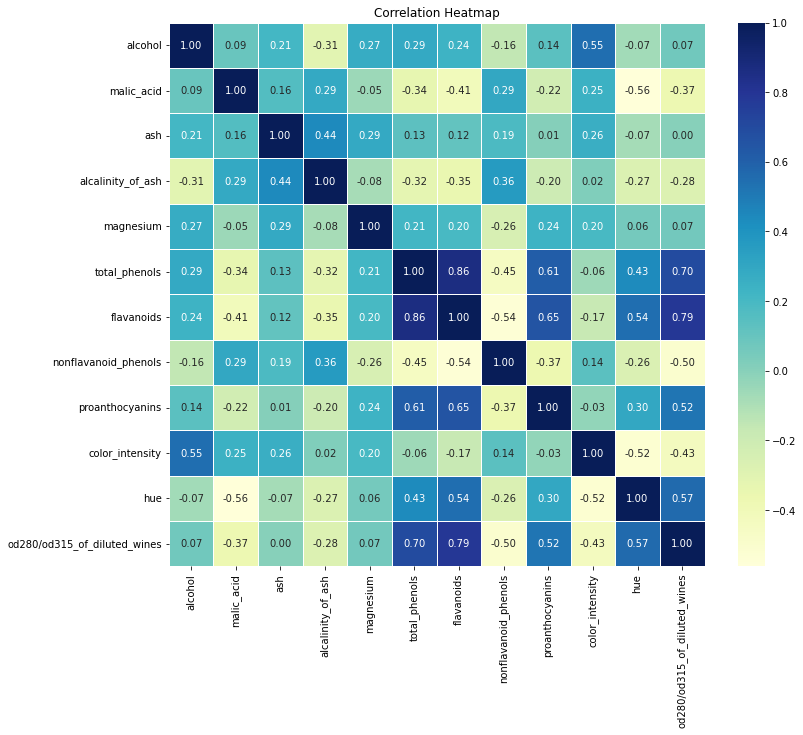

In [4]:
correlation_matrix = df_wine.iloc[:, :-1].corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

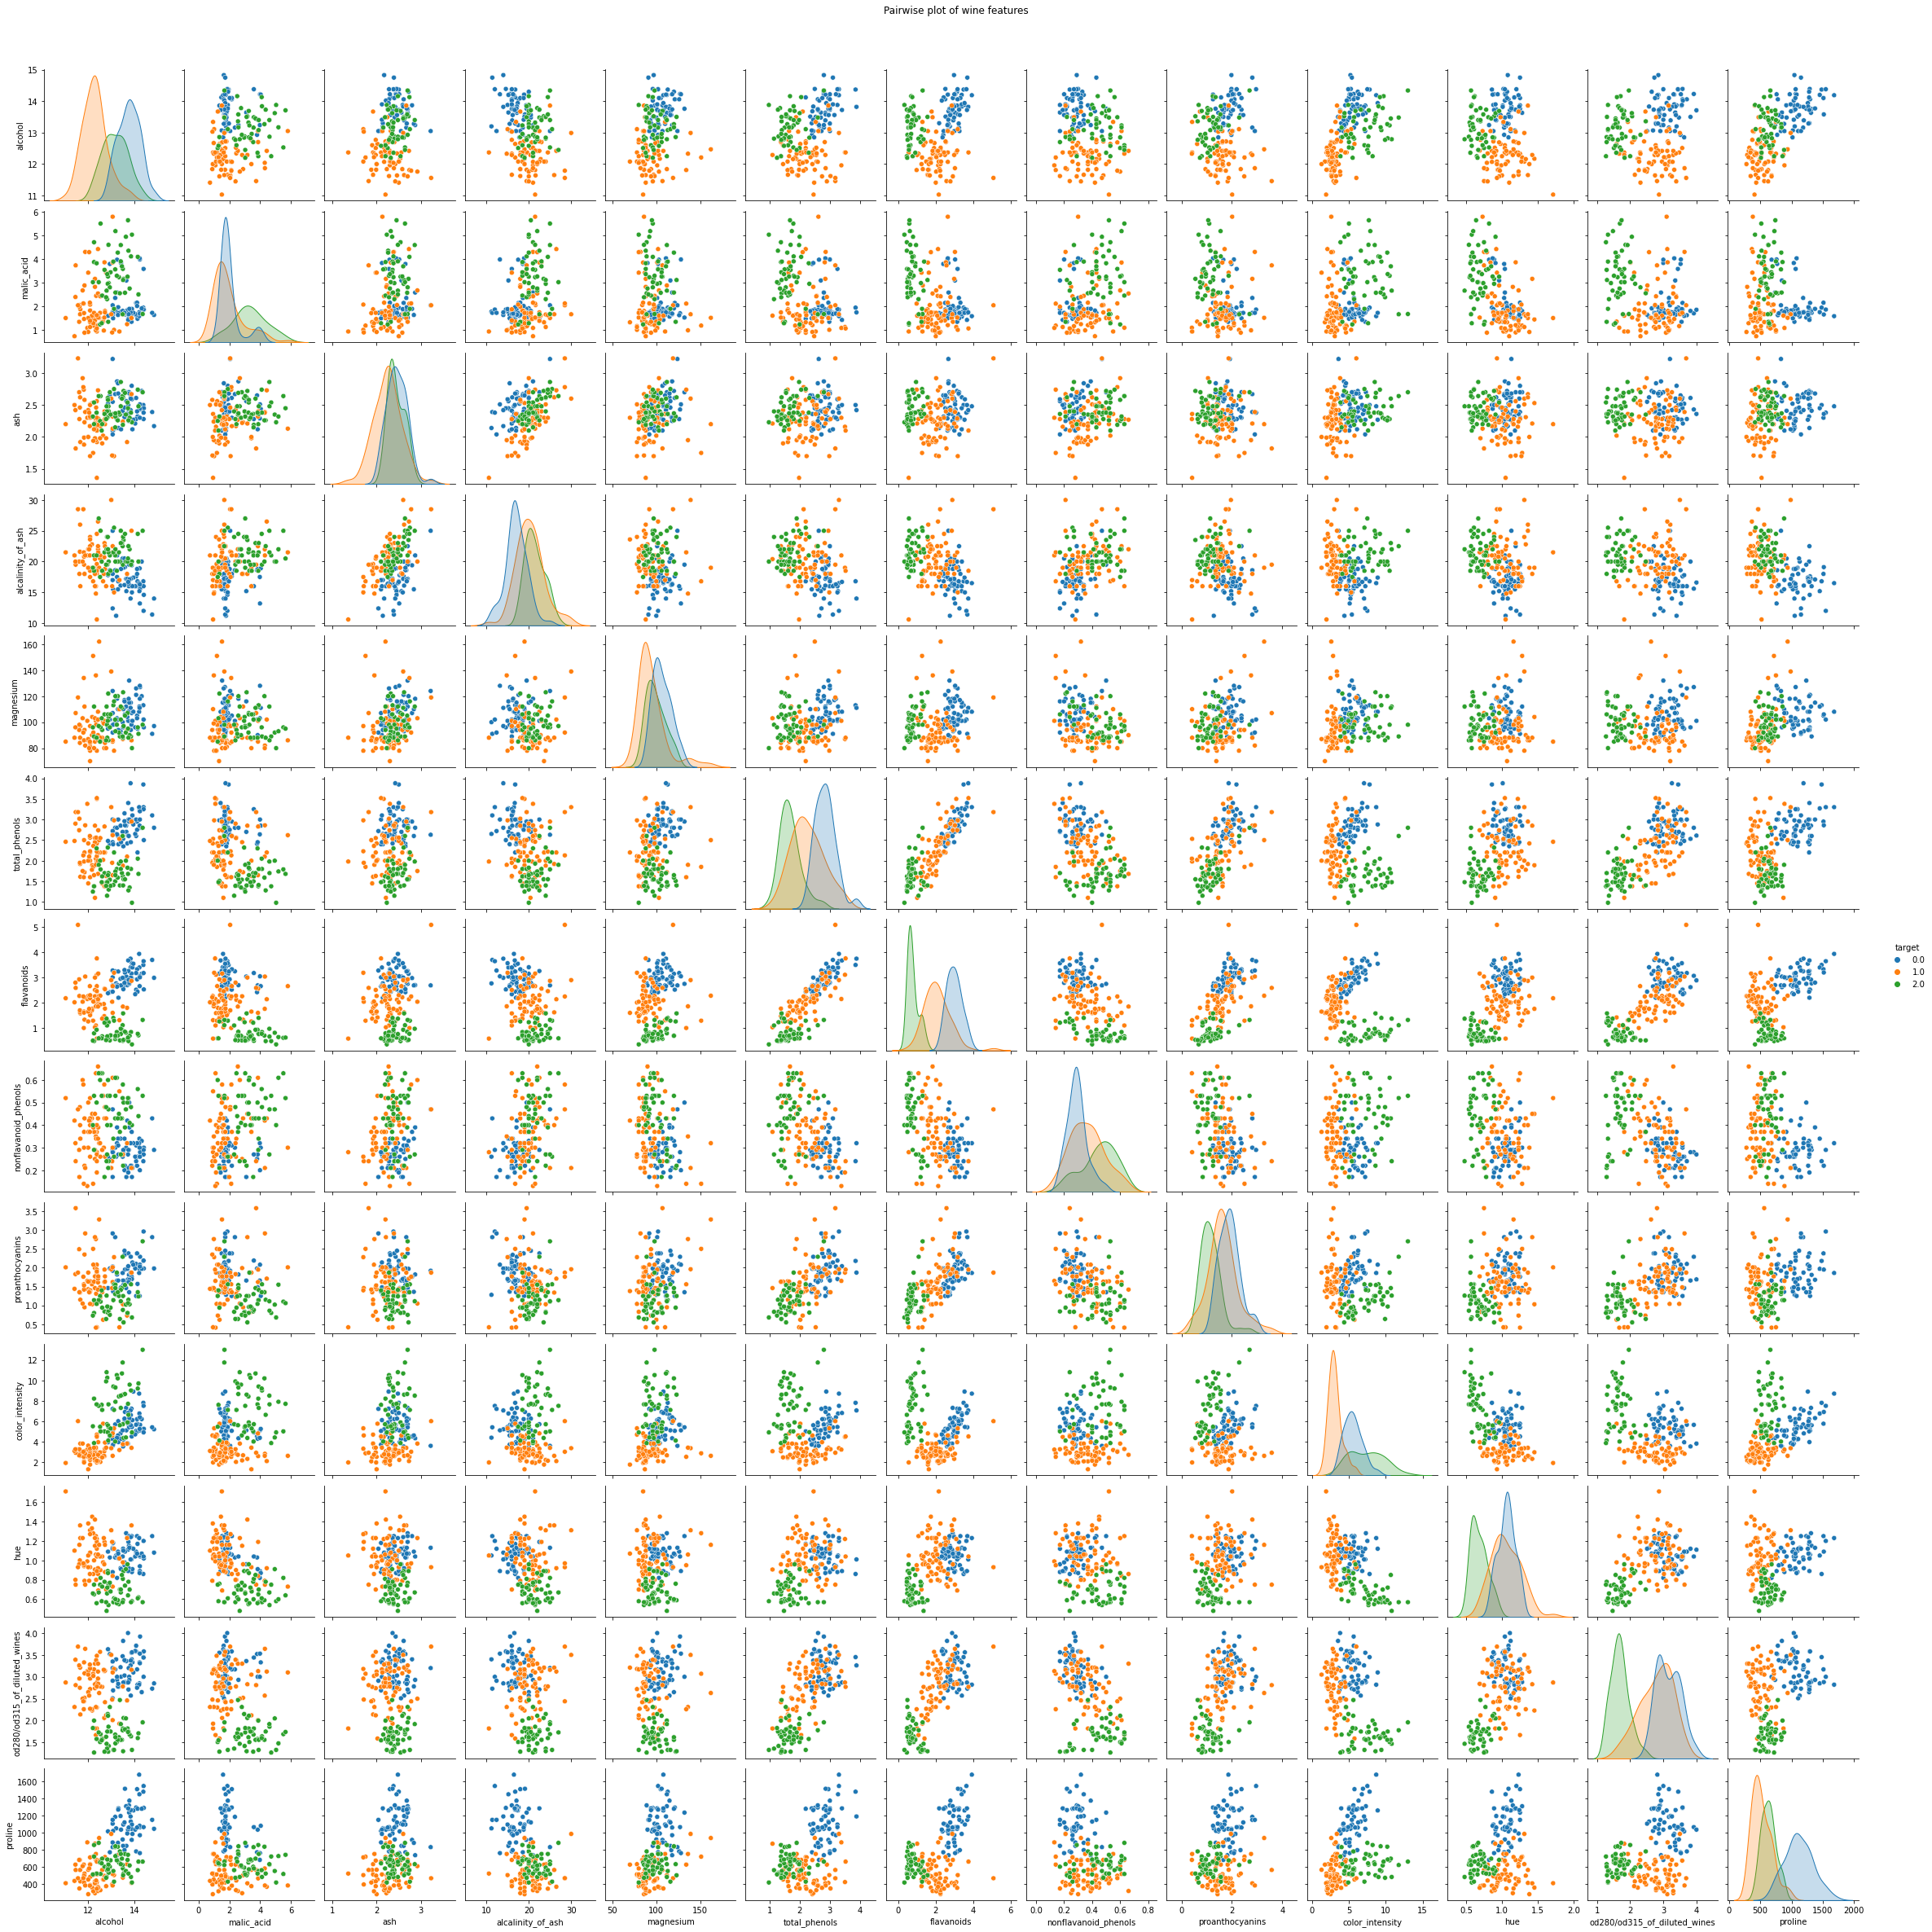

In [5]:
X = df_wine.values
y = wine.target

# Combine features and target variable into a DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=list(df_wine.columns) + ['target'])

# Create a pairwise plot using Seaborn
sns.pairplot(df, hue='target', palette='tab10')
plt.suptitle('Pairwise plot of wine features', y=1.02)
plt.show()

In [6]:
features_selected = ['flavanoids','color_intensity','proline','hue']
X = df_wine[features_selected].values
y = wine.target
df_wine['label'] = wine.target 
df_wine.label.value_counts(normalize=True).round(3)

1    0.399
0    0.331
2    0.270
Name: label, dtype: float64

In [7]:
#baseline caluculation
from sklearn.metrics import accuracy_score

majority_class = df_wine['label'].mode()[0]
baseline_predictions = [majority_class] * len(df_wine)
baseline_accuracy = accuracy_score(df_wine['label'], baseline_predictions)

print("Baseline accuracy:", baseline_accuracy)

Baseline accuracy: 0.398876404494382


From the results we can conclude the dataset is balanced and thus accuracy metric should be used. Seeing that the dataset is small as well k-Fold Cross-Validation should be used. The accuracy score provides a baseline for the model to comapre with. The model should not perform worse than this baseline.

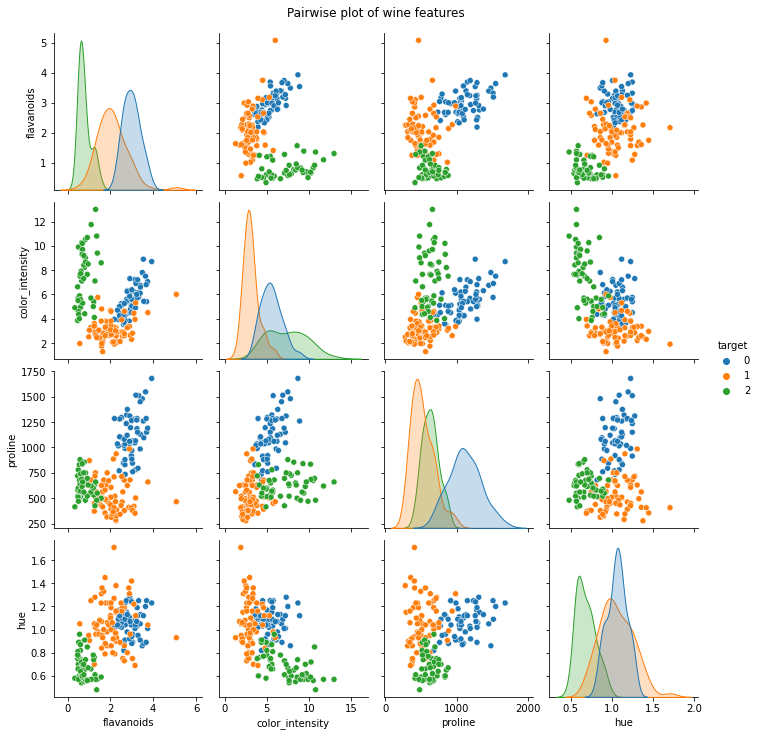

In [8]:
df_subset = df_wine[features_selected].copy()

df_subset['target'] = wine.target

sns.pairplot(df_subset, hue='target', palette='tab10')

plt.suptitle('Pairwise plot of wine features', y=1.02)
plt.show()

## implementing kNN from scratch

In [9]:
##splitting function
def my_train_test_split(X, y, size):
    assert 0 < size < 1.0, "use only test size between 0 and 1"

    mySeed = 5252
    np.random.seed(mySeed)

    # shuffling x and y
    permutation = np.random.permutation(len(X))
    X, y = X[permutation], y[permutation]

    # Splitting
    split_point = int(len(X) * size)
    X_train, X_test = X[split_point:], X[:split_point]
    y_train, y_test = y[split_point:], y[:split_point]

    return X_train, X_test, y_train, y_test

In [10]:
##calculate distance
def distance_calculator(trainData, testData, distance):
    dist = []
    for a in testData:
        if distance == 'manhattan':
            x = np.abs(training_data - a)
            y = np.sum(x, axis=1)
        elif distance == 'euclidean':
            x = (trainData - a) ** 2
            y = np.sqrt(np.sum(x, axis=1))
        dist.append(y)
    return np.array(dist)

In [11]:
#knn from scratch
def mykNN(X_train, y_train, X_test, k, distance_type):
    # getting distance
    distances = distance_calculator(X_train, X_test, distance_type)

    # Get sorted indexes of k nearest neighbors
    k_nearest_indexes = [np.argsort(distance)[:k] for distance in distances]

    # Predict labels based on the most common label among k nearest neighbors
    predictions = [np.argmax(np.bincount(y_train[indexes])) for indexes in k_nearest_indexes]

    return np.array(predictions)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = my_train_test_split(X, y, 0.3)

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training and testing data
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Use the k-Nearest Neighbors algorithm to predict the labels
predicted_labels = mykNN(scaled_X_train, y_train, scaled_X_test, 5, "euclidean")

print("Predicted labels:")
print(predicted_labels)

print("\nActual labels:")
print(y_test)

# Calculate and print the accuracy
accuracy_score = np.mean(predicted_labels == y_test)
print("\nAccuracy score:")
print(accuracy_score)

Predicted labels:
[2 0 2 0 2 0 0 0 0 1 2 0 0 2 2 0 2 2 0 0 1 2 0 2 2 0 2 0 2 0 1 1 2 1 0 1 2
 2 0 2 1 1 1 2 1 0 1 2 2 0 0 0 1]

Actual labels:
[2 0 2 0 2 0 1 0 0 1 2 0 0 2 2 0 2 2 0 0 1 2 1 2 2 0 2 0 2 0 1 1 2 1 0 1 2
 2 0 2 1 1 1 2 1 0 1 2 2 0 0 0 1]

Accuracy score:
0.9622641509433962


In [13]:
#cross validaiton by scratch
def cross_validation(X, y, cv, ks, distance_type, metric):
    indices = np.arange(len(y))
    np.random.shuffle(indices)

    fold_sizes = np.full(cv, len(y) // cv, dtype=int)
    fold_sizes[:len(y) % cv] += 1  
    folds = np.split(indices, np.cumsum(fold_sizes)[:-1])

    cvs = {}
    for k in ks:
        cvs[k] = np.mean([
            score_func(y[test_index], mykNN(X[train_index], y[train_index], X[test_index], k, distance_type))
            for train_index, test_index in [(np.concatenate([folds[j] for j in range(cv) if j != i]), folds[i]) for i in range(cv)]
        ])

    best_k = max(cvs, key=cvs.get)
    return best_k, cvs[best_k], cvs

def score_func(y_true, y_pred):
    if metric == "accuracy":
        return np.mean(y_true == y_pred)
    elif metric == "f1_score":
        classes = np.unique(y_true)
        f1_scores = [
            f1_score(c, y_true, y_pred)
            for c in classes
        ]
        return np.mean(f1_scores)
    else:
        raise Exception("Error: Only accuracy and f1_score are supported.")

def f1_score(c, y_true, y_pred):
    tp = np.sum((y_true == c) & (y_pred == c))
    fp = np.sum((y_true != c) & (y_pred == c))
    fn = np.sum((y_true == c) & (y_pred != c))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

In [14]:
k_values = [1, 3, 4, 5, 6, 7]
distance_type = 'euclidean'
cv = 3
metric = 'accuracy'

scaler = StandardScaler()
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

#using cross_validation function
best_k, best_score, cvs = cross_validation(X, y, cv, k_values, distance_type, metric)

# Print results
print(f"Best k: {best_k}")
print(f"Best {metric}: {best_score}")
print(f"{metric} for each k: {cvs}")

Best k: 1
Best accuracy: 0.7299435028248588
accuracy for each k: {1: 0.7299435028248588, 3: 0.7191148775894538, 4: 0.6797551789077213, 5: 0.6402071563088513, 6: 0.707909604519774, 7: 0.6795668549905839}


In [15]:
#using best k value obtained from cross validation
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training and testing data
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Use the k-Nearest Neighbors algorithm to predict the labels
predicted_labels = mykNN(scaled_X_train, y_train, scaled_X_test, 1, "euclidean")

print("Predicted labels:")
print(predicted_labels)

print("\nActual labels:")
print(y_test)

# Calculate and print the accuracy
accuracy_score = np.mean(predicted_labels == y_test)
print("\nAccuracy score:")
print(accuracy_score)

Predicted labels:
[2 0 2 0 2 0 1 0 0 1 2 0 0 2 2 0 2 2 0 0 1 2 1 2 2 0 2 0 2 0 1 1 2 1 0 1 2
 2 0 2 1 1 1 2 2 0 1 2 2 0 0 0 1]

Actual labels:
[2 0 2 0 2 0 1 0 0 1 2 0 0 2 2 0 2 2 0 0 1 2 1 2 2 0 2 0 2 0 1 1 2 1 0 1 2
 2 0 2 1 1 1 2 1 0 1 2 2 0 0 0 1]

Accuracy score:
0.9811320754716981


Confusion Matrix:
[[19  0  0]
 [ 0 13  1]
 [ 0  0 20]]


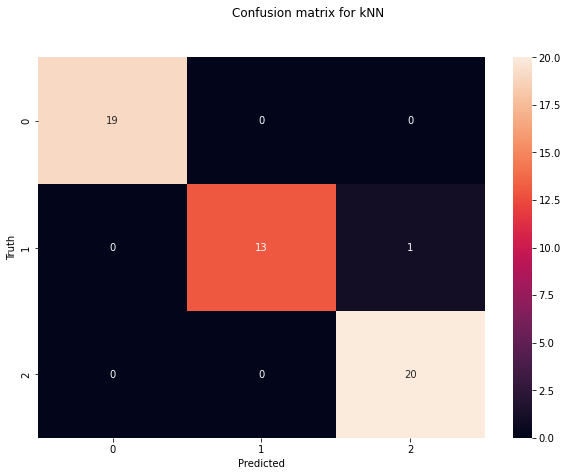

In [16]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_pred = mykNN(Xs_train, y_train, Xs_test, 1, "euclidean")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

#plotting confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.suptitle('Confusion matrix for kNN')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## This section will make use of scikit to build a decision tree

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model using train data
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_train)

print("Predicted values:")
print(y_pred)
print("\nTrue values:")
print(y_train)

accuracy = np.mean(y_pred == y_train)
print("\nAccuracy:")
print(accuracy)

Predicted values:
[2 2 0 2 0 1 1 1 2 0 1 1 2 0 0 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1
 0 2 1 0 2 0 1 0 1 0 0 1 1 0 2 0 1 1 0 1 1 1 2 2 0 1 2 2 0 1 0 1 2 2 1 2 1
 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 0 2 2 1 0 0 1 2 2 0 1 2 2 2 2 0 0
 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 0 2 0 1 1 0 1 1]

True values:
[2 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1
 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1
 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0
 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 1 2 0 1 1 0 1 1]

Accuracy:
0.9366197183098591


## cross validation using scikit learn

In [18]:
from sklearn.model_selection import cross_val_score

# List of max_depth values to try
max_depths = list(range(1, 10))

# Dictionary to store the mean cross-validation score for each max_depth
scores = {}

for max_depth in max_depths:
    # Initialize the model
    clf = DecisionTreeClassifier(max_depth=max_depth)

    # Perform cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    scores[max_depth] = np.mean(cv_scores)

# Find the max_depth that gives the highest mean score
best_max_depth = max(scores, key=scores.get)
best_score = scores[best_max_depth]

print(f"Best max_depth: {best_max_depth}")
print(f"Best cross-validation score: {best_score}")

Best max_depth: 3
Best cross-validation score: 0.9362068965517242


In [19]:
#using best depth and train data
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_train)

print("Predicted values:")
print(y_pred)
print("\nTrue values:")
print(y_train)

accuracy = np.mean(y_pred == y_train)
print("\nAccuracy:")
print(accuracy)

Predicted values:
[2 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1
 0 2 1 0 2 1 1 0 1 0 0 1 1 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1
 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 1 1 2 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0
 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 1 2 0 1 1 0 1 1]

True values:
[2 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1
 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1
 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0
 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 1 2 0 1 1 0 1 1]

Accuracy:
0.9859154929577465


In [20]:
#using best depth provided by cross validation and using test data

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

print("Predicted values:")
print(y_pred)
print("\nTrue values:")
print(y_test)

accuracy = np.mean(y_pred == y_test)
print("\nAccuracy:")
print(accuracy)

Predicted values:
[0 0 2 0 1 0 1 2 1 2 1 1 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]

True values:
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]

Accuracy:
0.9444444444444444


Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


Text(69.0, 0.5, 'Truth')

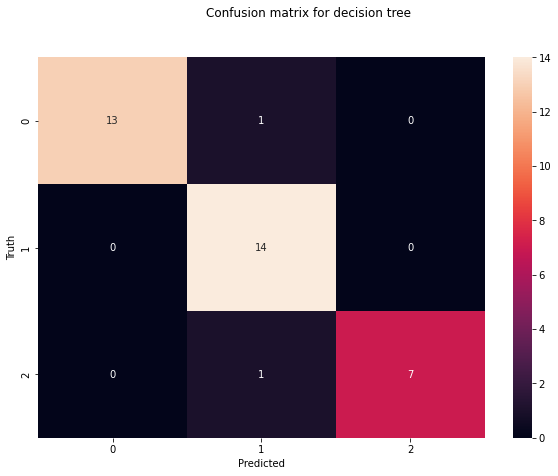

In [21]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.suptitle('Confusion matrix for decision tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# code references

[1] https://www.youtube.com/watch?v=rTEtEy5o3X0 (kNN implementation, also with reference from material from my educational institute)

[2] https://copyprogramming.com/howto/computing-macro-average-f1-score-using-numpy-python-without-using-scikit-learn#how-can-i-define-a-function-for-calculating-accuracy-precision-recall-and-f1(cross validation, also with reference from material from my educational institute)